In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## is this is? 
train_data = pd.read_csv('/Users/ashley/Downloads/audio-features/audio-train.csv', header=None)
np.shape(train_data)

(13464, 14)

In [6]:
## or is this it?
data = pd.read_csv('/Users/ashley/Documents/FALL_2018/Artificial_Intelligence/AI_project/spotify_features/spotify_features_1500.csv', header=None)
test_data = pd.read_csv('/Users/ashley/Documents/FALL_2018/Artificial_Intelligence/audio_features_connect.csv', header=None)
print(np.shape(data))
print(np.shape(test_data))

(6904, 13)
(16830, 13)


In [16]:
## maybe this?
spotify_data = pd.read_csv("/Users/ashley/Documents/FALL_2018/Artificial_Intelligence/spotify_features.csv")

In [18]:
spotify_data.columns

Index(['spotify_id', 'danceability', 'energy', 'key1', 'loudness', 'mode1',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_dep_index'],
      dtype='object')

In [51]:
spotify_data['label'] = spotify_data["track_dep_index"].map(lambda x: 0 if x <= 0.67 else 1)#(1 if 0.33 < x <= 0.66 else 2))

In [52]:
spotify_data['label']

0        1
1        0
2        0
3        0
4        0
5        0
6        1
7        1
8        0
9        1
10       1
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
16800    0
16801    0
16802    0
16803    0
16804    0
16805    0
16806    0
16807    0
16808    0
16809    0
16810    0
16811    0
16812    0
16813    1
16814    1
16815    1
16816    1
16817    1
16818    1
16819    1
16820    1
16821    1
16822    1
16823    1
16824    1
16825    0
16826    0
16827    0
16828    0
16829    0
Name: label, Length: 16830, dtype: int64

In [53]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True)

X = spotify_data.drop(["spotify_id", "time_signature", "track_dep_index", "label"], axis=1)
y = spotify_data["label"]

for train_index, test_index in skf.split(X, y,):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(accuracy_score(y_test, preds))

TRAIN: [    1     2     4 ... 16827 16828 16829] TEST: [    0     3     5 ... 16807 16812 16826]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8836104513064132
TRAIN: [    0     1     2 ... 16827 16828 16829] TEST: [    9    29    41 ... 16820 16823 16824]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8818289786223278
TRAIN: [    0     3     5 ... 16827 16828 16829] TEST: [    1     2     4 ... 16816 16818 16822]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8799762329174093
TRAIN: [    0     1     2 ... 16827 16828 16829] TEST: [    6    22    26 ... 16817 16821 16825]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8847296494355318
TRAIN: [    0     1     2 ... 16827 16828 16829] TEST: [   12    17    18 ... 16796 16810 16819]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8847296494355318
TRAIN: [    0     1     2 ... 16827 16828 16829] TEST: [   25    33    40 ... 16804 16806 16814]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8835412953060012
TRAIN: [    0     1     2 ... 16826 16828 16829] TEST: [   10    15    37 ... 16761 16811 16827]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8793820558526441
TRAIN: [    0     1     2 ... 16827 16828 16829] TEST: [   20    21    51 ... 16788 16789 16792]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8853238265002971
TRAIN: [    0     1     2 ... 16826 16827 16828] TEST: [   31    49    66 ... 16787 16791 16829]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8799048751486326
TRAIN: [    0     1     2 ... 16826 16827 16829] TEST: [    8    13    14 ... 16813 16815 16828]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8846611177170036


In [54]:
other_spotify_features = pd.read_csv("/Users/ashley/Documents/FALL_2018/Artificial_Intelligence/AI_Project/spotify_features/spotify_features.csv", header=None)

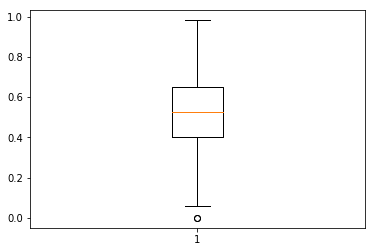

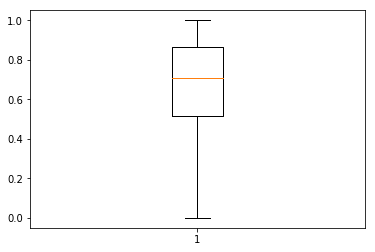

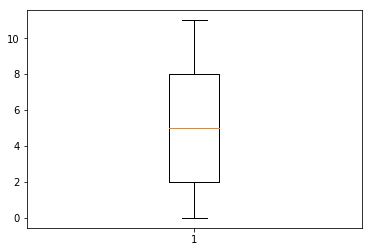

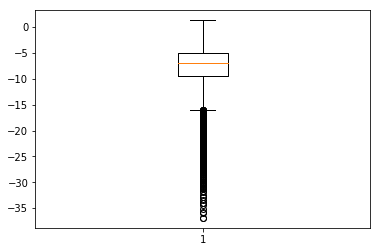

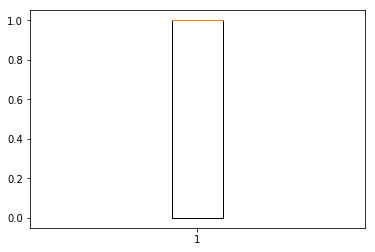

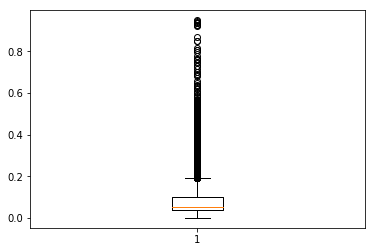

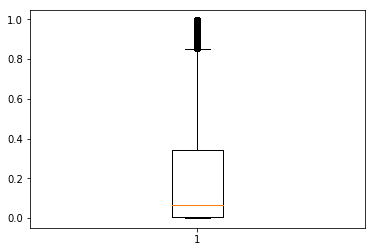

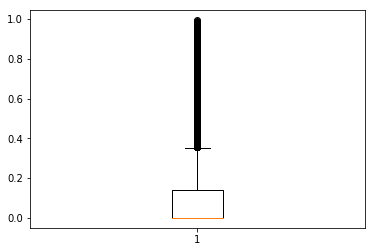

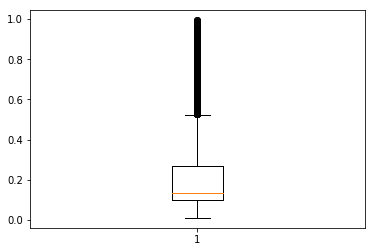

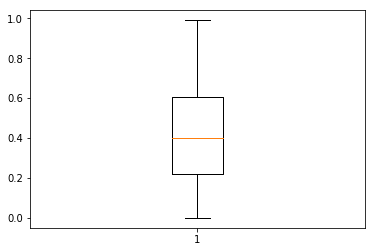

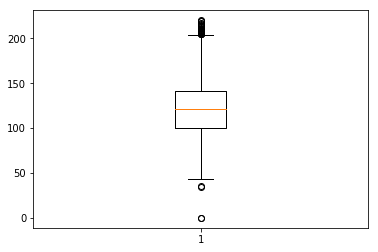

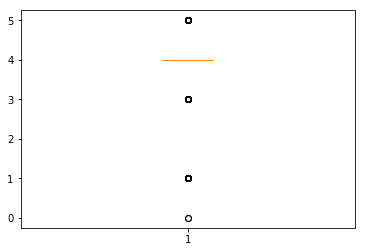

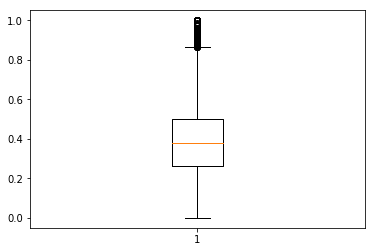

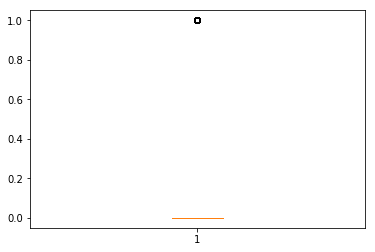

In [55]:
for col in spotify_data.columns[1::]:
    plt.boxplot(spotify_data[col])
    plt.show()

In [57]:
spotify_data[['danceability', 'energy', 'key1', 'loudness', 'mode1',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'label']].corr()

,danceability,energy,key1,loudness,mode1,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
danceability,1.000000,-0.049912,0.011676,0.094564,-0.033593,0.196078,-0.032686,-0.238506,-0.091744,0.424674,-0.131622,-0.028863
energy,-0.049912,1.000000,0.016765,0.776285,-0.024284,0.138656,-0.687816,-0.120893,0.204877,0.272989,0.228170,0.013603
key1,0.011676,0.016765,1.000000,0.007679,-0.174534,0.019944,-0.012222,0.006552,0.000203,0.016927,-0.009451,0.008542
loudness,0.094564,0.776285,0.007679,1.000000,-0.011451,0.108143,-0.604081,-0.319027,0.130172,0.241590,0.164123,0.017780
mode1,-0.033593,-0.024284,-0.174534,-0.011451,1.000000,-0.038314,0.024306,-0.028144,0.003349,0.025317,0.007341,0.006494
speechiness,0.196078,0.138656,0.019944,0.108143,-0.038314,1.000000,-0.050405,-0.169565,0.136953,0.097185,0.017723,-0.004054
acousticness,-0.032686,-0.687816,-0.012222,-0.604081,0.024306,-0.050405,1.000000,0.121627,-0.114283,-0.169117,-0.179670,-0.012275
instrumentalness,-0.238506,-0.120893,0.006552,-0.319027,-0.028144,-0.169565,0.121627,1.000000,-0.040623,-0.237869,-0.007495,-0.032183
liveness,-0.091744,0.204877,0.000203,0.130172,0.003349,0.136953,-0.114283,-0.040623,1.000000,0.032061,0.003693,0.008659
valence,0.424674,0.272989,0.016927,0.241590,0.025317,0.097185,-0.169117,-0.237869,0.032061,1.000000,0.060484,0.010933


In [47]:
spotify_data.columns

Index(['spotify_id', 'danceability', 'energy', 'key1', 'loudness', 'mode1',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_dep_index', 'label'],
      dtype='object')